In [1]:
import pandas as pd
import numpy as np
import os
from os import path
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# paths lead to txt files with lists of array ids for each genotype grouping
# (DKD refers to BTBR ob/ob and WT refers to BTBR wt/wt)
DKD_puckids = list(pd.read_csv('to_process_all_DKD.txt',header=None)[0])
WT_puckids = list(pd.read_csv('to_process_all_WT.txt',header=None)[0])
UMODWT_puckids = list(pd.read_csv('to_process_all_UMODWT.txt',header=None)[0])
UMODKI_puckids = list(pd.read_csv('to_process_all_UMODKI.txt',header=None)[0])
human_puckids = list(pd.read_csv('to_process_all_human.txt',header=None)[0])

In [3]:
genos = ['WT','DKD','UMOD-WT','UMOD-KI','human']
d = {}
for geno in genos:
    d[geno] = pd.DataFrame()
for geno in genos:
    print(geno)
    puckids = eval('{geno}_puckids'.format(geno=geno.replace('-','')))
    for puckid in puckids:
        # input_path is path to file with cluster x featuers, where clusters are glomerulus-gc pairs
        # features = {'Ren1_overlap_avg','Ren1_nooverlap_avg'}, or the average expression of Ren1/REN in Ren1/REN+ beads overlapping
        # with glomerular beads and the average expression of Ren1/REN in Ren1/REN+ beads not overlapping with glomerular beads, respectively
        input_path = '{puckid}_ren1_overlap_avg_comp.csv'.format(geno=geno,puckid=puckid)
        if path.exists(input_path):
            df = pd.read_csv(input_path,index_col=0)
            d[geno] = pd.concat([d[geno],df])

WT
DKD
UMOD-WT
UMOD-KI
human


In [5]:
for geno in genos:
    d[geno]=pd.melt(d[geno], value_vars=['Ren1_overlap_avg', 'Ren1_nooverlap_avg'])
    d[geno]=d[geno].replace({'Ren1_overlap_avg':'Overlap','Ren1_nooverlap_avg':'GC'})

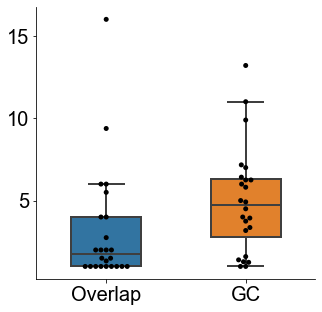

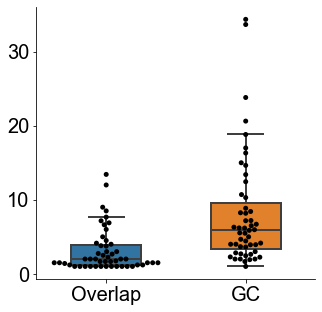

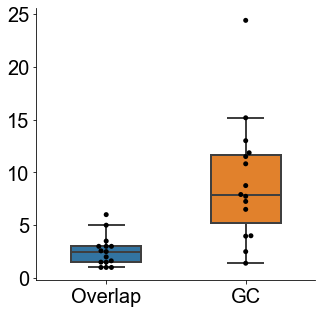

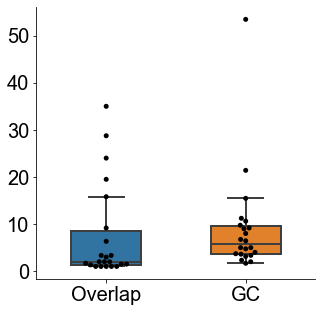

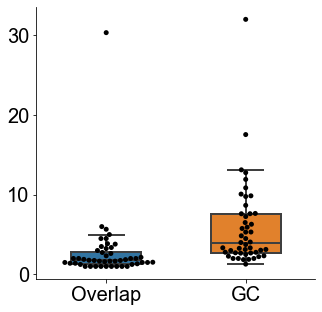

In [6]:
for geno in genos:
    plt.figure(figsize=(5,5))
    plt.rcParams["font.family"] = "Arial"
    plt.rcParams['font.size'] = 20
    ax = sns.swarmplot(data=d[geno],x=d[geno].variable,y=d[geno].value,color='black')
    sns.boxplot(data=d[geno],x=d[geno].variable,y=d[geno].value,width=0.5,linewidth=2,showfliers=False,ax=ax)
    ax.set(xlabel='', ylabel='')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    out_path = '{geno}_ren1_overlap.pdf'.format(geno=geno)
    plt.savefig(out_path,dpi=300,bbox_inches='tight')